In [4]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

## Dates & Other Constants

In [5]:
# Define path to files
# For MacOS
# PATH = "/Users/derekbanas/Documents/Tutorials/Python for Finance/Stocks/"
# For Windows
PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

## Get Stock File Names in a List

In [6]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 2886 total stocks
tickers.sort()
len(tickers)

2887

## Function that Returns a Dataframe from a CSV

In [7]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

## Merge Multiple Stocks in One Dataframe by Column Name

In [8]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

## Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight. 

$w_1r_1 + w_2r_2 = r_p$

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

$(w_1\sigma_1 + w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_1 + w_2^2\sigma_2^2$

## Plotting an Efficient Frontier

## Stock Portfolio

In [28]:
# Here I added the top 30 for each sector. You can obviously add as many as 
# you like
# Then to keep the portfolio smaller I eliminated stocks that had an 
# allocation less than 1% to get this final list
# I showed in part 4 of this series how to get the top sector stocks
port_list = ["GNRC", "CPRT", "ODFL", 
            "AMD", "PAYC",
            "CHTR",
            "MKC", "PG",
            "PGR",
            "NEM",
            "CCI",
            "COG"]
num_stocks = len(port_list)
num_stocks

12

## Merge all Stock Price Data

In [10]:
mult_df = merge_df_by_column_name('Adj Close',  '2018-01-01', 
                                  '2021-09-01', *port_list)
mult_df

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,COG
Date,,,,,,,,,,,,
2018-01-02,48.029999,43.599998,88.451561,10.980000,80.440002,348.970001,47.967422,81.579140,47.749058,34.842434,96.650520,26.996706
2018-01-03,49.730000,43.389999,88.543671,11.550000,81.029999,353.029999,48.081146,81.480141,47.723183,34.550255,96.242355,27.118145
2018-01-04,50.070000,43.740002,89.063423,12.120000,83.110001,349.790009,48.384403,82.056091,47.714550,34.933739,95.124413,27.006050
2018-01-05,50.410000,43.529999,89.872673,11.880000,83.879997,350.880005,48.858246,82.110107,47.895683,35.061573,95.851990,26.865927
2018-01-08,49.529999,43.549999,90.767464,12.280000,84.639999,356.549988,48.910378,82.542084,48.042313,35.025055,96.135902,27.006050
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,427.470001,142.970001,286.100006,107.269997,481.149994,797.400024,84.930000,142.419998,96.230003,56.630001,189.729996,14.710000
2021-08-27,437.109985,144.440002,289.779999,111.400002,484.700012,807.179993,85.220001,142.309998,97.489998,58.189999,190.970001,15.630000
2021-08-30,442.700012,144.449997,293.839996,111.320000,488.850006,814.200012,85.449997,142.929993,96.150002,57.509998,192.309998,15.740000


## Plot Growth of Investments over Total Dataset

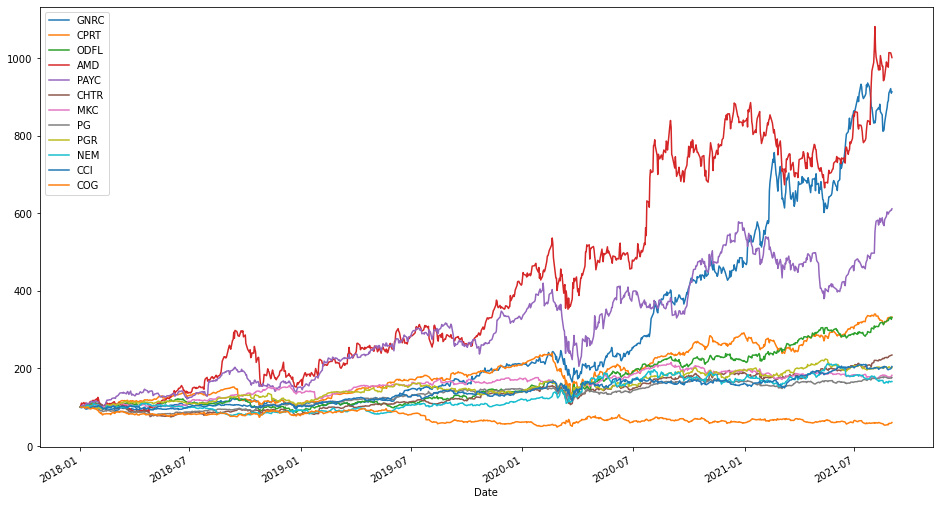

In [11]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))


## Mean Returns

In [12]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

GNRC    0.598098
CPRT    0.324805
ODFL    0.323745
AMD     0.623055
PAYC    0.489661
CHTR    0.230481
MKC     0.162225
PG      0.153344
PGR     0.189987
NEM     0.137231
CCI     0.193843
COG    -0.137088
dtype: float64

## Covarience

In [13]:
returns.cov() * 252

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,COG
GNRC,0.159613,0.062755,0.061049,0.087651,0.087327,0.043597,0.033553,0.029501,0.041143,0.026130,0.043714,0.037308
CPRT,0.062755,0.099416,0.051345,0.067254,0.086628,0.038143,0.028973,0.026304,0.031401,0.017898,0.034677,0.029454
ODFL,0.061049,0.051345,0.100928,0.065668,0.063107,0.035235,0.028407,0.023554,0.037729,0.016320,0.030777,0.026825
AMD,0.087651,0.067254,0.065668,0.310878,0.115725,0.056770,0.035622,0.031541,0.043595,0.035976,0.042983,0.035392
PAYC,0.087327,0.086628,0.063107,0.115725,0.226168,0.052201,0.042189,0.033631,0.054628,0.022705,0.058568,0.039046
CHTR,0.043597,0.038143,0.035235,0.056770,0.052201,0.084478,0.023507,0.025966,0.028844,0.015235,0.035133,0.023732
MKC,0.033553,0.028973,0.028407,0.035622,0.042189,0.023507,0.067610,0.033964,0.031042,0.019189,0.039238,0.022557
PG,0.029501,0.026304,0.023554,0.031541,0.033631,0.025966,0.033964,0.049657,0.030195,0.012378,0.034569,0.026913
PGR,0.041143,0.031401,0.037729,0.043595,0.054628,0.028844,0.031042,0.030195,0.073633,0.014716,0.035560,0.027867
NEM,0.026130,0.017898,0.016320,0.035976,0.022705,0.015235,0.019189,0.012378,0.014716,0.106692,0.020386,0.015366


## Correlation

In [14]:
returns.corr()

,GNRC,CPRT,ODFL,AMD,PAYC,CHTR,MKC,PG,PGR,NEM,CCI,COG
GNRC,1.000000,0.498180,0.480992,0.393483,0.459618,0.375450,0.322995,0.331365,0.379509,0.200235,0.394875,0.238711
CPRT,0.498180,1.000000,0.512578,0.382553,0.577717,0.416206,0.353394,0.374370,0.367005,0.173780,0.396908,0.238795
ODFL,0.480992,0.512578,1.000000,0.370726,0.417694,0.381583,0.343890,0.332705,0.437657,0.157272,0.349614,0.215847
AMD,0.393483,0.382553,0.370726,1.000000,0.436432,0.350311,0.245704,0.253855,0.288142,0.197539,0.278212,0.162262
PAYC,0.459618,0.577717,0.417694,0.436432,1.000000,0.377648,0.341179,0.317347,0.423311,0.146166,0.444448,0.209878
CHTR,0.375450,0.416206,0.381583,0.350311,0.377648,1.000000,0.311047,0.400908,0.365723,0.160468,0.436236,0.208718
MKC,0.322995,0.353394,0.343890,0.245704,0.341179,0.311047,1.000000,0.586171,0.439961,0.225935,0.544592,0.221761
PG,0.331365,0.374370,0.332705,0.253855,0.317347,0.400908,0.586171,1.000000,0.499345,0.170056,0.559846,0.308733
PGR,0.379509,0.367005,0.437657,0.288142,0.423311,0.365723,0.439961,0.499345,1.000000,0.166027,0.472930,0.262522
NEM,0.200235,0.173780,0.157272,0.197539,0.146166,0.160468,0.225935,0.170056,0.166027,1.000000,0.225235,0.120258


## Generate Random Weights Equal to 1

In [15]:
# Generate 11 random values that sum to 1
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.02125654 0.0863398  0.10370128 0.07141497 0.13453457 0.11800204
 0.06616309 0.09840712 0.07043698 0.13111772 0.08559052 0.01303537]
Total Weight : 1.0


## Calculating Return of Portfolio

In [16]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.28390185446891075

## Calculating Volatility

In [17]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.2155872767446207

## Analyzing Returns & Risks of 10000 Combinations

In [18]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.22366768, 0.23713079, 0.27917645, ..., 0.25094577, 0.3137677 ,
        0.27602019]),
 array([0.21091707, 0.21099248, 0.21953026, ..., 0.2001485 , 0.23880335,
        0.2260317 ]),
 array([1.00118818, 1.06463888, 1.21475945, ..., 1.19134431, 1.26157233,
        1.16585501]),
 array([[0.0099252 , 0.17746138, 0.18036987, ..., 0.03476538, 0.1236237 ,
         0.14245444],
        [0.00826212, 0.02766726, 0.00626476, ..., 0.15894628, 0.01553257,
         0.06621301],
        [0.07874556, 0.09581541, 0.10071715, ..., 0.09381277, 0.08243235,
         0.09325075],
        ...,
        [0.0783439 , 0.05438719, 0.09017437, ..., 0.10600157, 0.09038185,
         0.05181441],
        [0.06976678, 0.00944471, 0.10398129, ..., 0.13647668, 0.10225679,
         0.06320932],
        [0.1101336 , 0.02937373, 0.01068159, ..., 0.08448402, 0.13293521,
         0.10129792]]))

## Plotting the Efficient Frontier

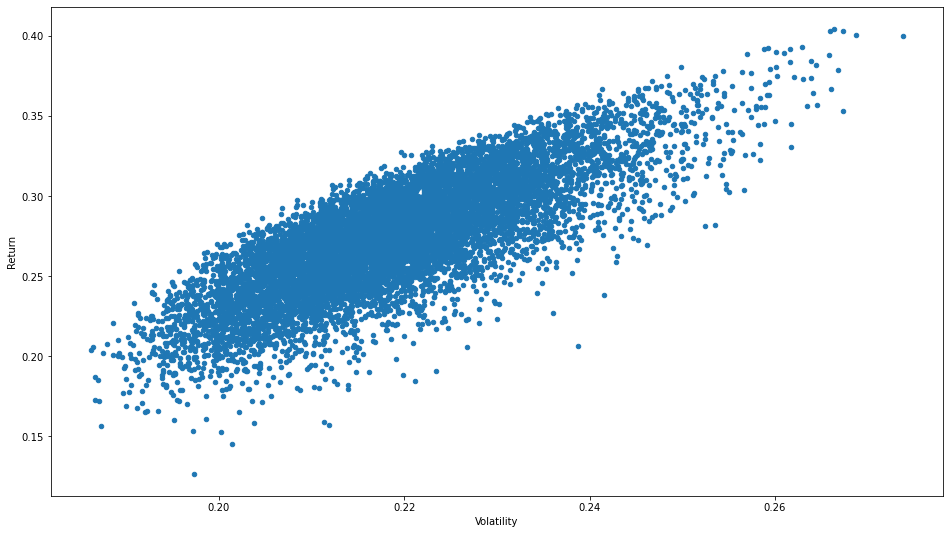

In [19]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

## Sharpe Ratio

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find the portfolio that provides the best return for the lowest amount of risk. 

*Sharpe Ratio* = $\frac{r_i - r_f}{\sigma_i}$

$r_f = $ Risk Free Rate

$r_i = $ Rate of Return of the stock

$\sigma_i = $ Standard Deviation of the Stock

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ration decreases.

In [20]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])


Stock : GNRC : 23.90
Stock : CPRT : 6.24
Stock : ODFL : 10.34
Stock : AMD : 16.55
Stock : PAYC : 5.04
Stock : CHTR : 0.43
Stock : MKC : 11.31
Stock : PG : 7.49
Stock : PGR : 9.51
Stock : NEM : 4.66
Stock : CCI : 1.99
Stock : COG : 2.53

Volatility : 0.24982450395435044
Return : 0.38018664879640185


## Get Number of Shares & Cost Based on Weights

In [25]:
# I'm going to use a similar portfolio that has slightly easier percents to work with

# Calculated Weighting
# Stock : GNRC : 21.90 
# Stock : CPRT : 15.63 
# Stock : ODFL : 23.83
# Stock : AMD : 11.09
# Stock : PAYC : 1.86
# Stock : CHTR : 3.55
# Stock : MKC : 2.87
# Stock : PG : 1.09
# Stock : PGR : 2.86
# Stock : NEM : 10.11
# Stock : CCI : 4.34
# Stock : COG : 0.87

Find percentage closest to 1 and use it as the basis for calculating all other shares
Since PG is 1% : GNRC is 21.90 : Multiply cost of PG (118.20) by 22 (21.9 Rounded up) and then divide 
that by the cost of GNRC to get the shares to buy for GNRC

118.20 * 22 = 2,600.4 / 102.01 = 25.49 (25 Shares) * 102.01 = 

In situations in which prices don't work either discard stock or force 1 share

In [21]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

## Get Portfolio Weighting

In [22]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

## Returns the Value of Portfolio by Date

In [23]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_df_start.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

## Approximate Portfolio Weighting Based on Request

In [26]:
port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", 
             "PG", "PGR", "NEM", "CCI", "COG"]

port_wts = [22, 16, 24, 11, 2, 4, 3, 1, 3, 10, 4, 1]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Adj Close',  '2020-01-02', 
                                  '2020-01-02', *port_list)
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()
# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

# Calculated Weighting
# Stock : GNRC : 21.90 
# Stock : CPRT : 15.63 
# Stock : ODFL : 23.83
# Stock : AMD : 11.09
# Stock : PAYC : 1.86
# Stock : CHTR : 3.55
# Stock : MKC : 2.87
# Stock : PG : 1.09
# Stock : PGR : 2.86
# Stock : NEM : 10.11
# Stock : CCI : 4.34
# Stock : COG : 0.87

tot_shares, share_cost = get_port_shares(118.20, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date('2020-12-31', tot_shares, port_list)

Shares : [25, 20, 22, 26, 1, 1, 4, 1, 5, 28, 3, 7]
Share Cost : [2550.250053405762, 1869.6000671386719, 2801.878051757813, 1276.5999603271484, 271.79998779296875, 490.42999267578125, 327.7214050292969, 118.2088623046875, 341.39949798583984, 1168.7718505859377, 405.90911865234364, 115.7245979309082]
Total Investment : 11738.293445587158
Stock Weights : [0.21725901343559373, 0.1592735840013883, 0.23869551947614145, 0.10875515817054887, 0.02315498322246732, 0.041780348646859845, 0.027918999175514648, 0.010070361833484953, 0.029084253138533016, 0.09956914571984232, 0.034579908956436874, 0.00985872422318878]


[102.01000213623048,
 93.4800033569336,
 127.35809326171876,
 49.099998474121094,
 271.79998779296875,
 490.42999267578125,
 81.93035125732422,
 118.2088623046875,
 68.27989959716797,
 41.74185180664063,
 135.30303955078122,
 16.532085418701172]